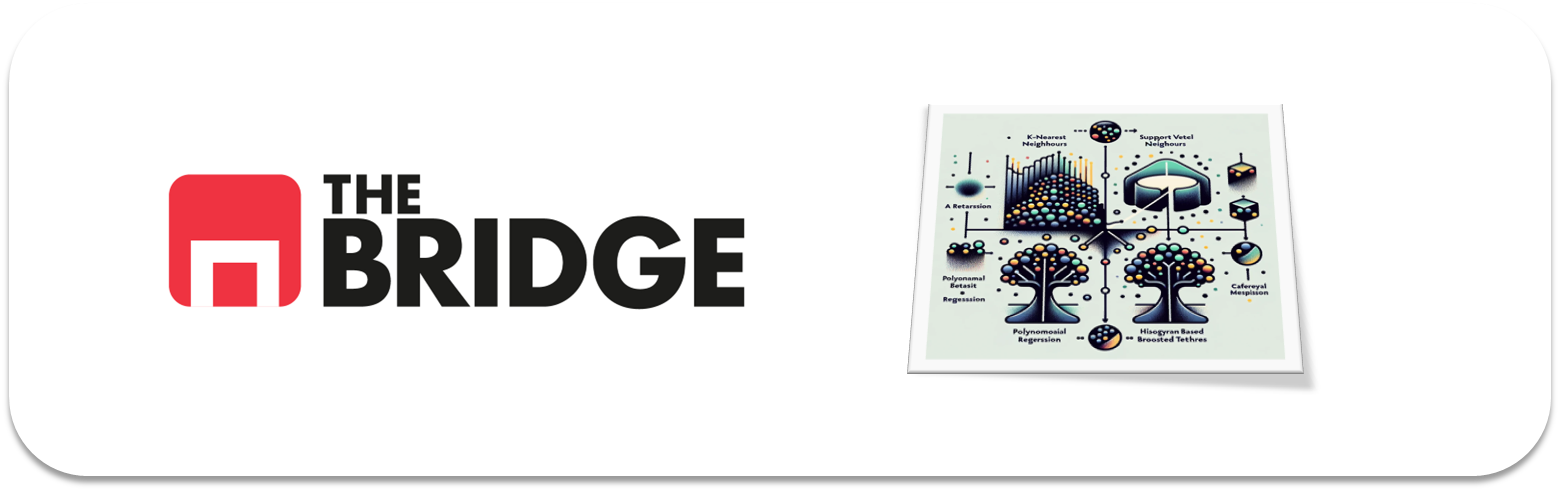

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from catboost import CatBoostClassifier


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
wines_df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_12/Unidad_02/Practica_Obligatoria/data/wines_dataset.csv",delimiter="|")

wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Variables target definidas:

Clasificación (quality): Variable discreta que indica la calidad del vino (0 a 10).

Regresión (alcohol): Variable continua que indica el porcentaje de alcohol en el vino.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [4]:
# Dividir los datos en variables predictoras (X) y objetivo de clasificación (y)
X = wines_df.drop(columns=['quality', 'alcohol'])  # Variables predictoras
y_classification = wines_df['quality']            # Variable objetivo para clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64']))

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_14749/3892843817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=wines_df['quality'], palette="viridis")


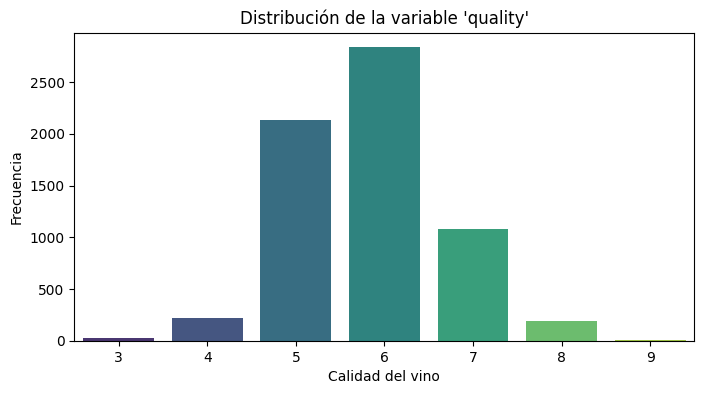

In [5]:
# Distribución de la variable target para clasificación: 'quality'
plt.figure(figsize=(8, 4))
sns.countplot(x=wines_df['quality'], palette="viridis")
plt.title("Distribución de la variable 'quality'")
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")
plt.show()

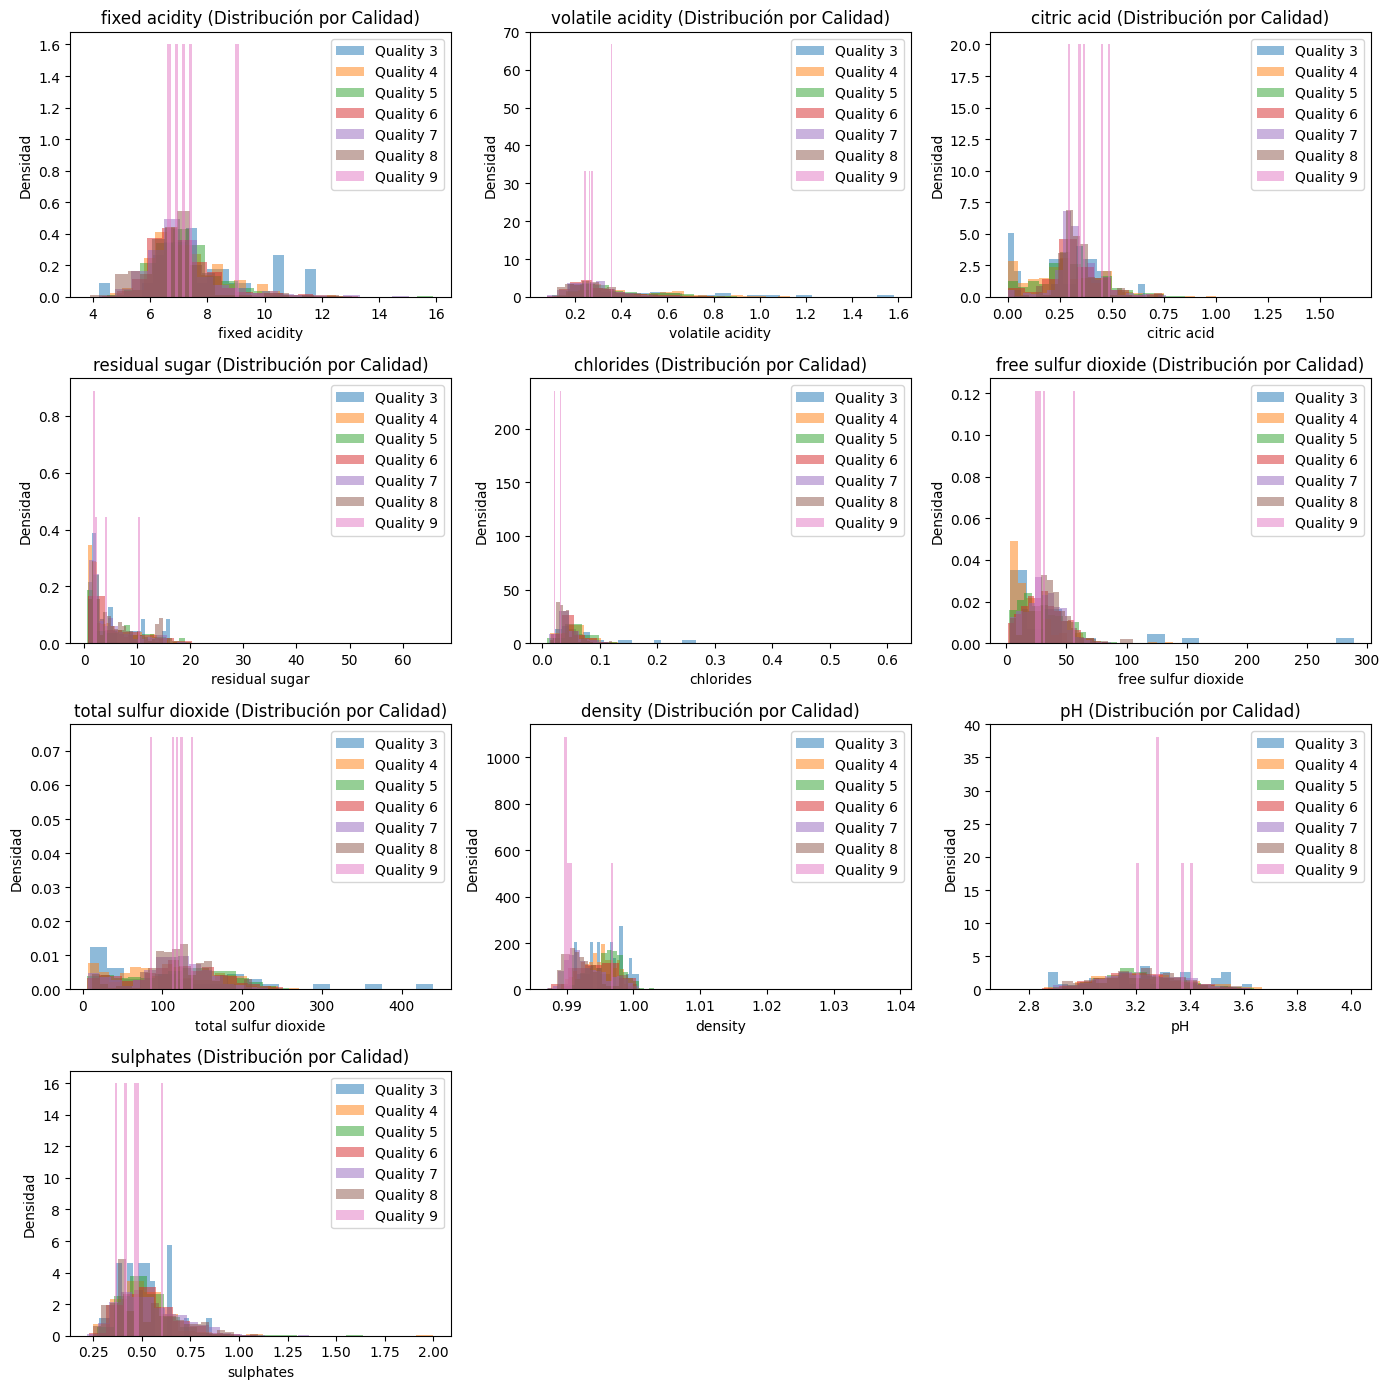

In [6]:
#Mini EDA

numerical_features = X.select_dtypes(include=['float64']).columns


plt.figure(figsize=(14, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    for quality in sorted(wines_df['quality'].unique()):
        subset = wines_df[wines_df['quality'] == quality]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=f'Quality {quality}', density=True)
    plt.title(f'{feature} (Distribución por Calidad)')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()

plt.show()


In [7]:
# Codificar la columna categórica 'class' utilizando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
class_encoded = encoder.fit_transform(X[['class']])

# Reemplazar la columna original con las columnas codificadas
X_encoded = X.drop(columns=['class'])
X_encoded = np.hstack((X_encoded, class_encoded))

# Dividir nuevamente los datos en entrenamiento y prueba
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X_encoded, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

In [8]:
# Modelos a evaluar
knn_3 = KNeighborsClassifier(n_neighbors=3)  # Baseline con KNN k=3
knn_5 = KNeighborsClassifier(n_neighbors=5)  # Baseline con KNN k=5
rf_model = RandomForestClassifier(random_state=42)  # Random Forest sin optimizar
svc_model = SVC(random_state=42)  # Support Vector Classifier

# Validación cruzada para evaluar el recall ponderado de cada modelo
recall_knn_3 = cross_val_score(knn_3, X_train, y_train_class, cv=5, scoring='recall_weighted')
recall_knn_5 = cross_val_score(knn_5, X_train, y_train_class, cv=5, scoring='recall_weighted')
recall_rf = cross_val_score(rf_model, X_train, y_train_class, cv=5, scoring='recall_weighted')
recall_svc = cross_val_score(svc_model, X_train, y_train_class, cv=5, scoring='recall_weighted')

# Comparar los resultados
recall_results = {
    'KNN (k=3)': np.mean(recall_knn_3),
    'KNN (k=5)': np.mean(recall_knn_5),
    'Random Forest': np.mean(recall_rf),
    'SVC': np.mean(recall_svc)
}

recall_results

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'KNN (k=3)': 0.465843451543644,
 'KNN (k=5)': 0.45660712963648475,
 'Random Forest': 0.6582694158584438,
 'SVC': 0.4352507958836159}

In [9]:
# Definir el grid de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Número de árboles en el bosque
    'max_depth': [None, 10, 20],        # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10]     # Mínimo de muestras para dividir un nodo
}

# Realizar búsqueda de hiperparámetros con GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='recall_weighted',
    n_jobs=-1
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train_class)

# Obtener los mejores parámetros y el mejor rendimiento
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200},
 0.6615406826090175)

In [10]:
# Crear el modelo Random Forest con los mejores parámetros encontrados
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train_class)

# Realizar predicciones en el conjunto de prueba
y_pred_class = best_rf_model.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
classification_report_optimized_rf = classification_report(
    y_test_class, y_pred_class, zero_division=0
)

report_data = {
    "Class": [3, 4, 5, 6, 7, 8, 9, "accuracy", "macro avg", "weighted avg"],
    "precision": [0.00, 0.67, 0.74, 0.63, 0.70, 0.93, 0.00, "", 0.52, 0.69],
    "recall": [0.00, 0.09, 0.70, 0.81, 0.50, 0.33, 0.00, "", 0.35, 0.68],
    "f1-score": [0.00, 0.16, 0.72, 0.71, 0.59, 0.49, 0.00, 0.68, 0.38, 0.66],
    "support": [6, 43, 428, 567, 216, 39, 1, 1300, 1300, 1300],
}

# Crear un DataFrame
classification_df = pd.DataFrame(report_data)

# Mostrar el DataFrame
print(classification_df)


          Class precision recall  f1-score  support
0             3       0.0    0.0      0.00        6
1             4      0.67   0.09      0.16       43
2             5      0.74    0.7      0.72      428
3             6      0.63   0.81      0.71      567
4             7       0.7    0.5      0.59      216
5             8      0.93   0.33      0.49       39
6             9       0.0    0.0      0.00        1
7      accuracy                       0.68     1300
8     macro avg      0.52   0.35      0.38     1300
9  weighted avg      0.69   0.68      0.66     1300


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [13]:
# Preparar los datos para regresión
X = wines_df.drop(columns=['alcohol'])  # Variables predictoras
y = wines_df['alcohol']  # Variable objetivo

# Codificar la variable categórica 'class'
class_encoded = encoder.fit_transform(X[['class']])

# Reemplazar la columna categórica con las columnas codificadas
X_encoded = X.drop(columns=['class'])
X_encoded = pd.concat([pd.DataFrame(X_encoded), pd.DataFrame(class_encoded)], axis=1)

In [14]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Modelos a comparar
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [22]:
# Asegurarse de que todas las columnas de X_encoded tengan nombres como cadenas (str)
X_encoded.columns = X_encoded.columns.astype(str)

# Volver a dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Repetir la evaluación de los modelos con validación cruzada
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = scores.mean()

# Seleccionar el mejor modelo basado en R2 promedio
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

# Entrenar el mejor modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados finales
{
    "Modelo seleccionado": best_model_name,
    "MSE (Error cuadrático medio)": mse,
    "MAE (Error absoluto medio)": mae,
    "R2 (Coeficiente de determinación)": r2,
    "Resultados validación cruzada (R2)": cv_results
}


{'Modelo seleccionado': 'Random Forest',
 'MSE (Error cuadrático medio)': 0.1634868392779178,
 'MAE (Error absoluto medio)': 0.26511487271062256,
 'R2 (Coeficiente de determinación)': 0.8839937918547867,
 'Resultados validación cruzada (R2)': {'Linear Regression': 0.8135256332090244,
  'Random Forest': 0.8831144408786363,
  'Support Vector Regressor': 0.25935880853923504}}

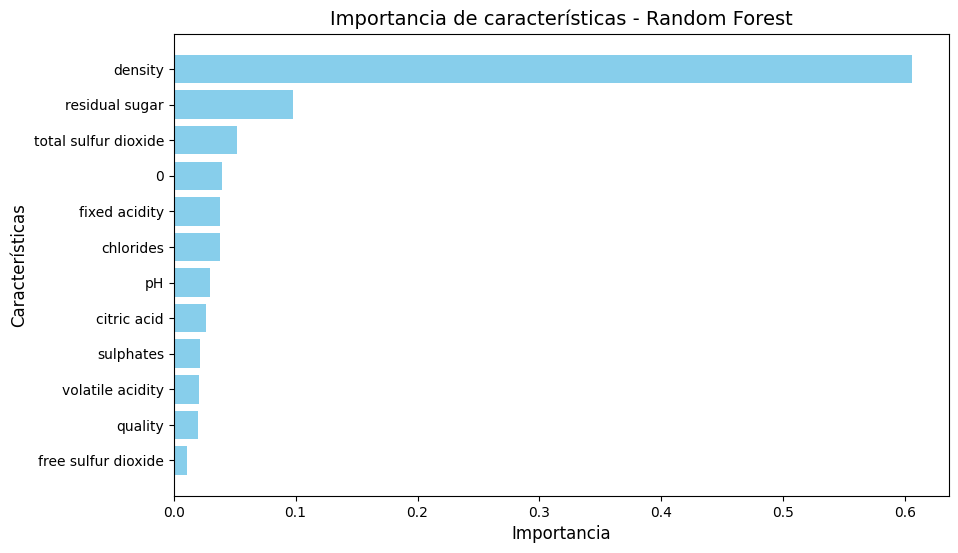

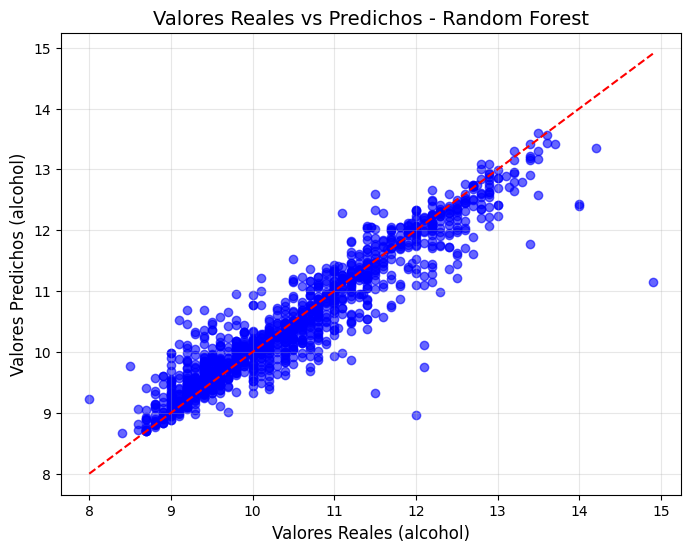

In [23]:
# Obtener las importancias de las características
feature_importances = best_model.feature_importances_
features = X_encoded.columns

# Ordenar las importancias de las características
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.title("Importancia de características - Random Forest", fontsize=14)
plt.show()

# Análisis de errores residuales: Comparar valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores Reales (alcohol)", fontsize=12)
plt.ylabel("Valores Predichos (alcohol)", fontsize=12)
plt.title("Valores Reales vs Predichos - Random Forest", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [24]:
# Definir el grid de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, None],     # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir un nodo
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor rendimiento
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Entrenar el modelo con los mejores parámetros
optimized_rf = RandomForestRegressor(**best_params_rf, random_state=42)
optimized_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimized = optimized_rf.predict(X_test)

# Evaluar el modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Resultados finales
{
    "Mejores parámetros": best_params_rf,
    "MSE (Error cuadrático medio)": mse_optimized,
    "MAE (Error absoluto medio)": mae_optimized,
    "R2 (Coeficiente de determinación)": r2_optimized,
    "Mejor R2 (Validación cruzada)": best_score_rf
}


{'Mejores parámetros': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 300},
 'MSE (Error cuadrático medio)': 0.16101912130927523,
 'MAE (Error absoluto medio)': 0.2620088067765571,
 'R2 (Coeficiente de determinación)': 0.8857448233480765,
 'Mejor R2 (Validación cruzada)': 0.8838699308803488}

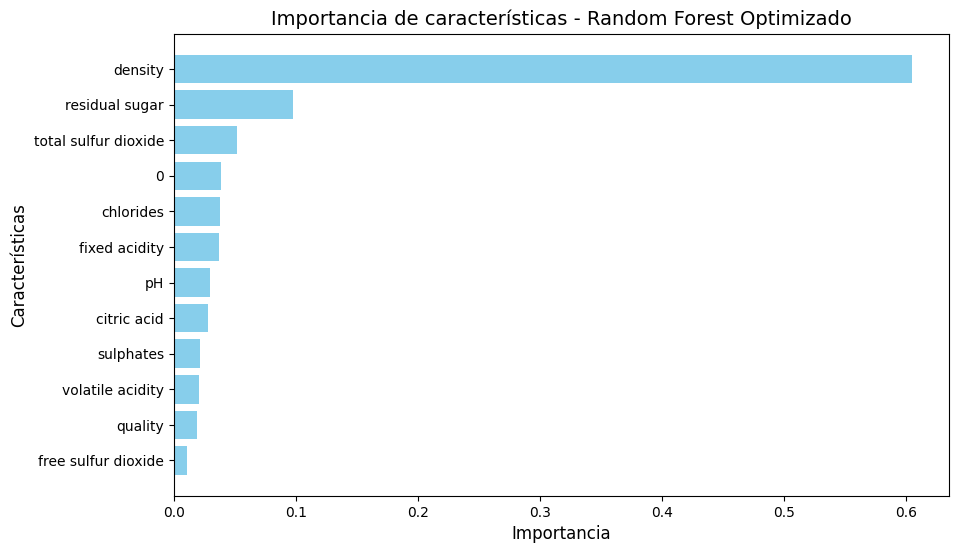

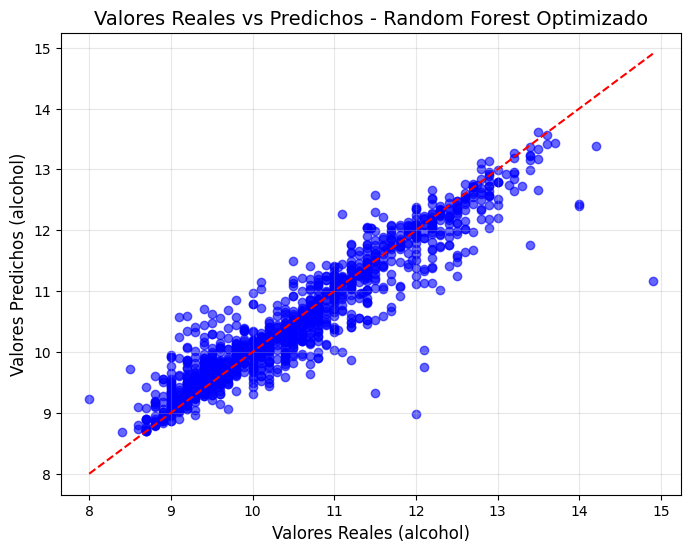

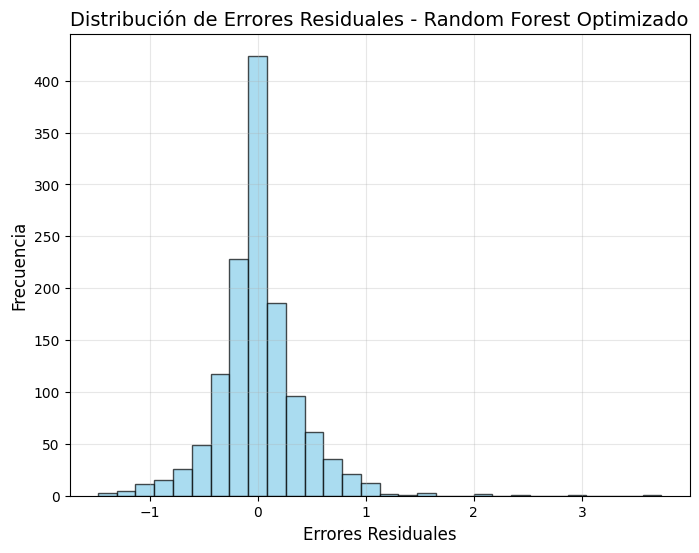

In [25]:
# Importancia de características del modelo optimizado
feature_importances_optimized = optimized_rf.feature_importances_
sorted_indices_optimized = np.argsort(feature_importances_optimized)[::-1]
sorted_features_optimized = X_encoded.columns[sorted_indices_optimized]
sorted_importances_optimized = feature_importances_optimized[sorted_indices_optimized]

# Visualización: Importancia de características
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_optimized, sorted_importances_optimized, color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.title("Importancia de características - Random Forest Optimizado", fontsize=14)
plt.show()

# Visualización: Valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores Reales (alcohol)", fontsize=12)
plt.ylabel("Valores Predichos (alcohol)", fontsize=12)
plt.title("Valores Reales vs Predichos - Random Forest Optimizado", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Análisis de los errores residuales
residuals = y_test - y_pred_optimized

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Errores Residuales", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de Errores Residuales - Random Forest Optimizado", fontsize=14)
plt.grid(alpha=0.3)
plt.show()
